# LIMPEZA E TRATAMENTO DE DADOS

In [70]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [71]:
dataset = pd.read_csv("Churn.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [72]:
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# MINI ANALISE GERAL

In [73]:
dataset.dtypes

Id                  int64
Score               int64
Estado             object
Genero             object
Idade               int64
Patrimonio          int64
Saldo               int64
Produtos            int64
TemCartCredito      int64
Ativo               int64
Salario           float64
Saiu                int64
dtype: object

In [74]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

# ANALISANO OS DADOS CATEGORICOS / OBJECT

In [75]:
for column in dataset.select_dtypes(include=['object']):
    print('\n', dataset.groupby([column]).size())



 Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

 Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64


# ANALISE DOS DADOS NUMERICOS

In [76]:
dataset.describe()

,Id,Score,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.920000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.528762e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.305800e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.029011e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.703250e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.405213e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


# FAZENDO O TRATAMENTO DOS DADOS NULLs

In [77]:
#substituir NAN por mediana
mediana = sts.median(dataset['Salario'])
dataset['Salario'].fillna(mediana, inplace=True)
dataset['Salario'].isnull().sum()

0

In [78]:
#preenche NAs com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)
dataset['Genero'].isnull().sum()

0

# CORRIGINDO DADOAS CATEGORICOS COM RUIDO

In [79]:
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"
dataset.groupby(['Genero']).size()

Genero
Feminino     464
Masculino    535
dtype: int64

In [80]:
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
dataset.groupby(['Estado']).size()

Estado
PR    257
RS    484
SC    258
dtype: int64

# AJUSTANDO DADOS DESCREPANTES E FORA DO LIMITE

In [81]:
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [82]:
mediana = sts.median(dataset['Idade'])
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [83]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [84]:
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [85]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
desv = sts.stdev(dataset['Salario']) 
dataset.loc[dataset['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [86]:
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(dataset['Salario'])
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana
dataset.loc[dataset['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


# FIM DO TRATAMENTO

In [87]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# GRAFICANDO DAOS POS TRATAMENTO

<Axes: xlabel='Estado'>

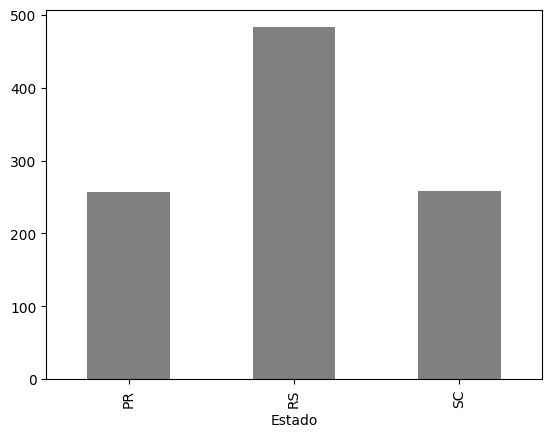

In [88]:
agrupado=dataset.groupby(['Estado']).size()
agrupado.plot.bar(color = 'gray')

<Axes: xlabel='Genero'>

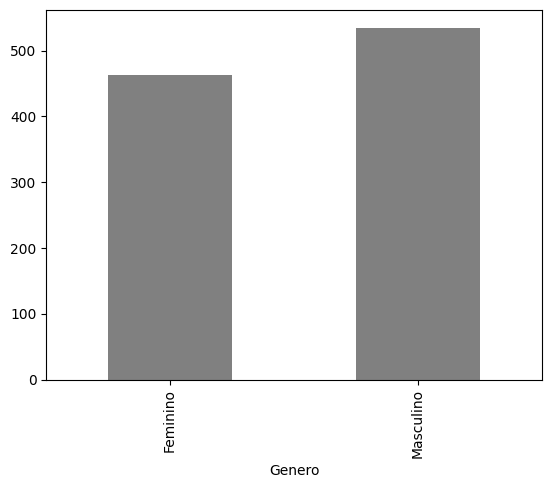

In [89]:
agrupado = dataset.groupby(['Genero']).size()
agrupado.plot.bar(color = 'gray')

Text(0.5, 1.0, 'Score')

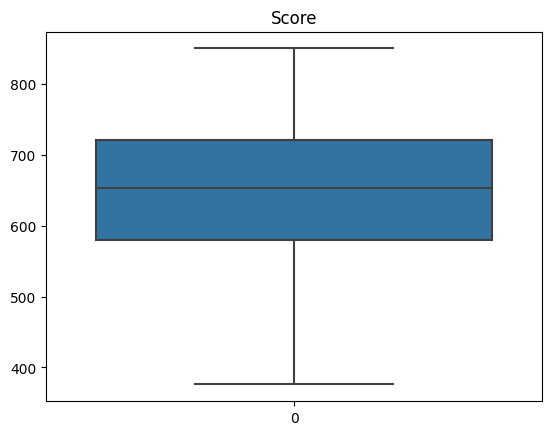

In [90]:
srn.boxplot(dataset['Score']).set_title('Score')

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_21216\4068248596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

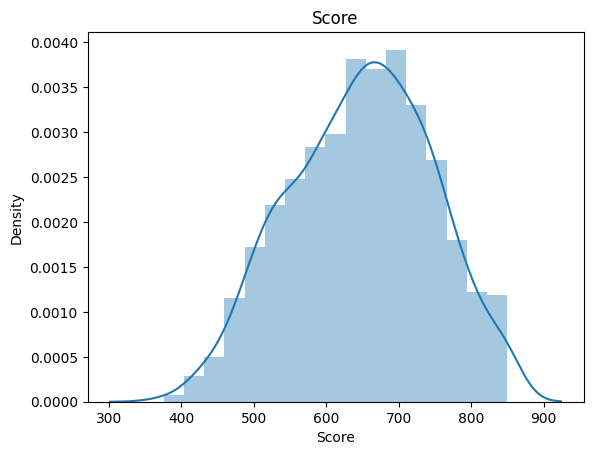

In [91]:
srn.distplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Idade')

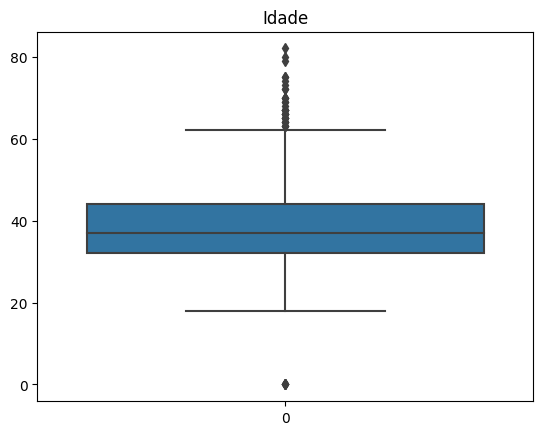

In [92]:
srn.boxplot(dataset['Idade']).set_title('Idade')

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_21216\1712185710.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Idade']).set_title('Idade')


Text(0.5, 1.0, 'Idade')

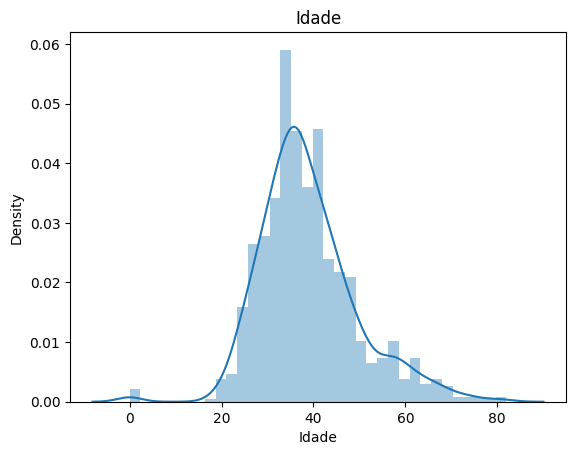

In [93]:
srn.distplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Saldo')

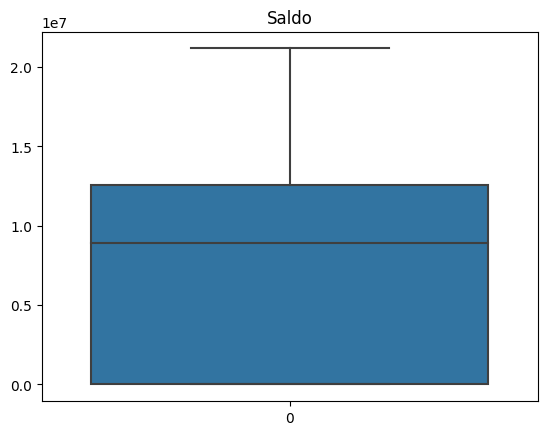

In [94]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_21216\3978263718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Saldo']).set_title('Saldo')


Text(0.5, 1.0, 'Saldo')

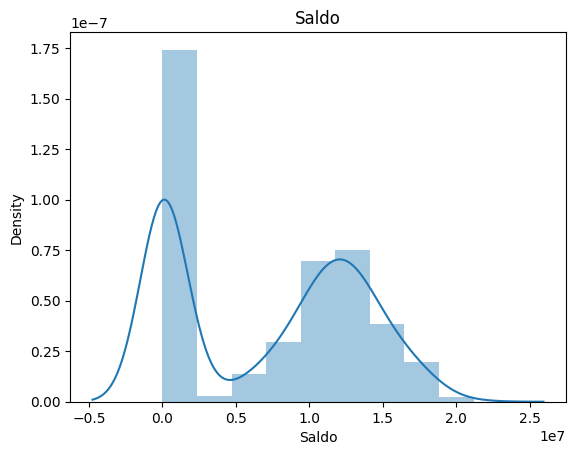

In [95]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Salario')

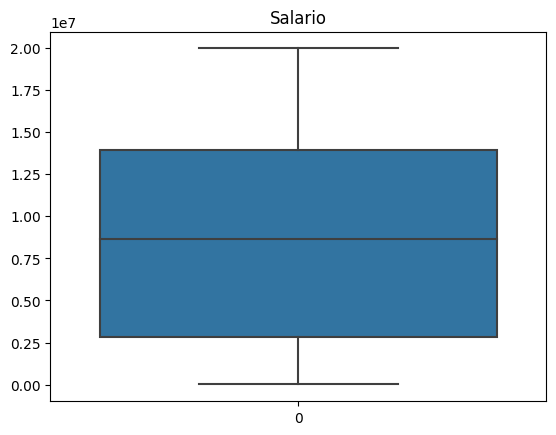

In [96]:
srn.boxplot(dataset['Salario']).set_title('Salario')

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_21216\108073612.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Salario']).set_title('Salario')


Text(0.5, 1.0, 'Salario')

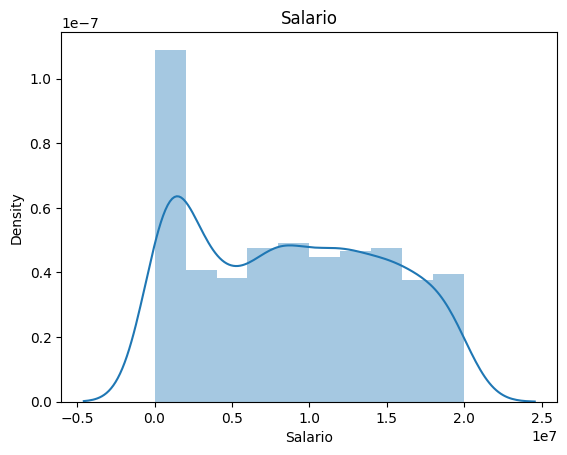

In [97]:
srn.distplot(dataset['Salario']).set_title('Salario')